In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [46]:
dados = pd.read_csv('yt.csv', encoding='latin1')

In [47]:
print(dados['created_year'])

0      2006.0
1      2006.0
2      2012.0
3      2006.0
4      2006.0
        ...  
990    2017.0
991    2018.0
992    2006.0
993    2012.0
994    2017.0
Name: created_year, Length: 995, dtype: float64


In [48]:
tipo_de_dados = dados['created_year'].dtypes
print(tipo_de_dados)

float64


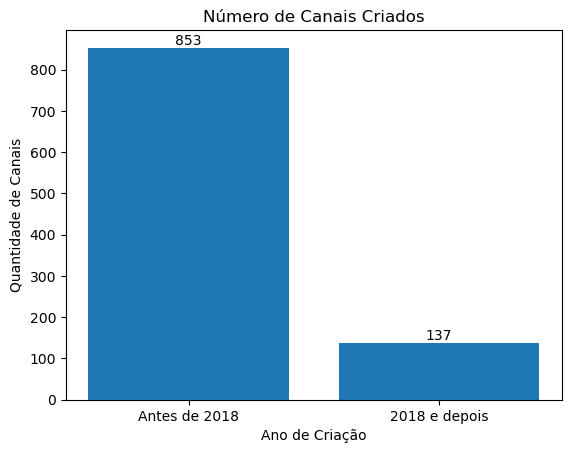

In [49]:
# Separando os dados em dois grupos (antes e depois de 2018)
canais_antes_2018 = dados[dados['created_year'] < 2018]
canais_2018_e_depois = dados[dados['created_year'] >= 2018]

# Contando a quantidade de canais em cada grupo
qtd_antes_2018 = len(canais_antes_2018)
qtd_2018_e_depois = len(canais_2018_e_depois)

# Preparando os dados para o gráfico
categorias = ['Antes de 2018', '2018 e depois']
quantidades = [qtd_antes_2018, qtd_2018_e_depois]

# Criando o gráfico de barras
plt.bar(categorias, quantidades)

# Adicionando os rótulos de quantidade em cima das barras
for i, valor in enumerate(quantidades):
    plt.text(i, valor + 0.1, str(valor), ha='center', va='bottom')
    
# Adicionando título e rótulos
plt.title('Número de Canais Criados')
plt.xlabel('Ano de Criação')
plt.ylabel('Quantidade de Canais')

# Exibindo o gráfico
plt.show()

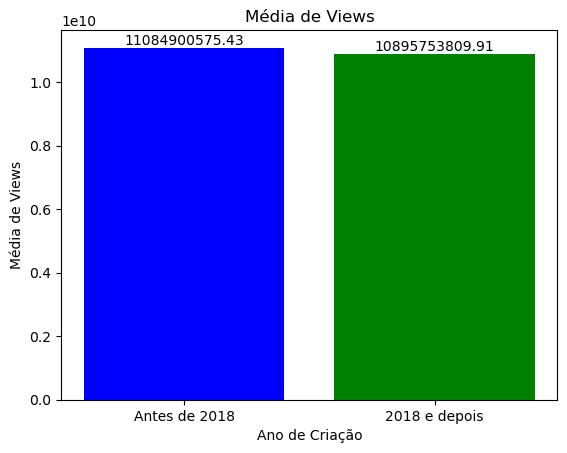

In [50]:
# Calculando a média de views para canais antes de 2018 e a partir de 2018
media_views_antes_2018 = dados[dados['created_year'] < 2018]['video views'].mean()
media_views_2018_e_depois = dados[dados['created_year'] >= 2018]['video views'].mean()

# Preparando os dados para o novo gráfico de barras
categorias = ['Antes de 2018', '2018 e depois']
medias_views = [media_views_antes_2018, media_views_2018_e_depois]

# Criando o novo gráfico de barras
plt.bar(categorias, medias_views, color=['blue', 'green'])

# Adicionando os valores acima das barras
for i, valor in enumerate(medias_views):
    plt.text(i, valor + 0.1, f'{valor:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Adicionando título e rótulos
plt.title('Média de Views')
plt.xlabel('Ano de Criação')
plt.ylabel('Média de Views')

# Exibindo o gráfico
plt.show()


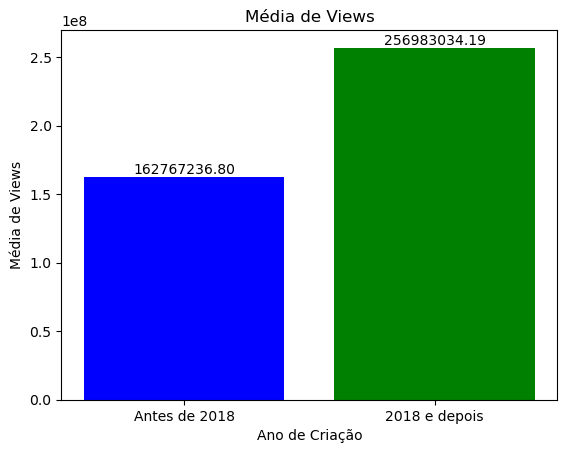

In [51]:
# Calculando a média de views nos ultimos 30 dias para canais antes de 2018 e a partir de 2018
media_views_30dias_antes_2018 = dados[dados['created_year'] < 2018]['video_views_for_the_last_30_days'].mean()
media_views_30dias_2018_e_depois = dados[dados['created_year'] >= 2018]['video_views_for_the_last_30_days'].mean()

# Preparando os dados para o novo gráfico de barras
categorias = ['Antes de 2018', '2018 e depois']
medias_views = [media_views_30dias_antes_2018, media_views_30dias_2018_e_depois]

# Criando o novo gráfico de barras
plt.bar(categorias, medias_views, color=['blue', 'green'])

# Adicionando os valores acima das barras
for i, valor in enumerate(medias_views):
    plt.text(i, valor + 0.1, f'{valor:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Adicionando título e rótulos
plt.title('Média de Views')
plt.xlabel('Ano de Criação')
plt.ylabel('Média de Views')

# Exibindo o gráfico
plt.show()


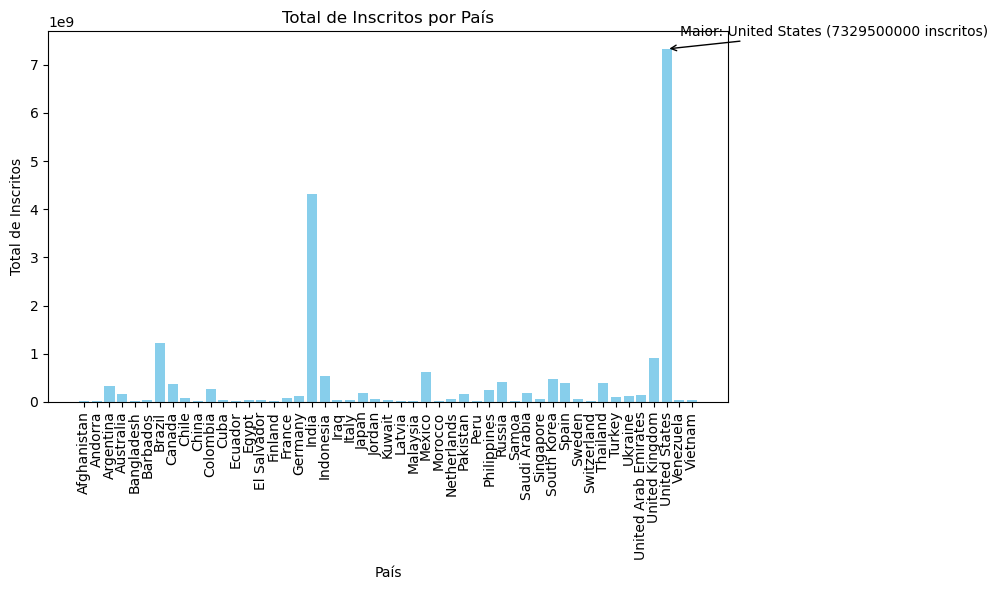

In [52]:
#País com mais inscritos
total_inscritos_por_pais = dados.groupby('Country')['subscribers'].sum()

# Encontrando o país com o maior número de inscritos
pais_maior_inscritos = total_inscritos_por_pais.idxmax()
maior_inscritos = total_inscritos_por_pais.max()

# Preparando dados para o gráfico de barras
paises = total_inscritos_por_pais.index
inscritos = total_inscritos_por_pais.values

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(paises, inscritos, color='skyblue')
plt.title('Total de Inscritos por País')
plt.xlabel('País')
plt.ylabel('Total de Inscritos')

# Adicionando anotação sobre o país com o maior número de inscritos
plt.annotate(f'Maior: {pais_maior_inscritos} ({maior_inscritos} inscritos)',
             xy=(paises.tolist().index(pais_maior_inscritos), maior_inscritos),
             xytext=(10, 10),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='black'))

# Adicionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

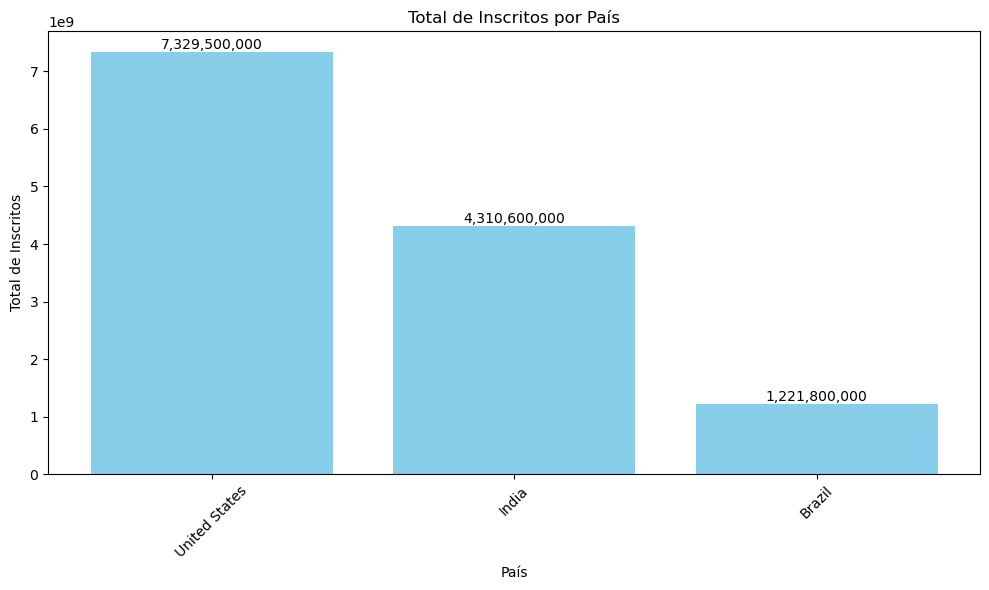

In [53]:
# Top 3 países com mais inscritos
total_inscritos_por_pais = dados.groupby('Country')['subscribers'].sum()

# Encontrando os três países com o maior número de inscritos
top_paises = total_inscritos_por_pais.nlargest(3)

# Preparando dados para o gráfico de barras
paises = top_paises.index
inscritos = top_paises.values

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(paises, inscritos, color='skyblue')
plt.title('Total de Inscritos por País')
plt.xlabel('País')
plt.ylabel('Total de Inscritos')

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50000,
             f'{inscritos[i]:,.0f}', ha='center', va='bottom', color='black', fontsize=10)

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

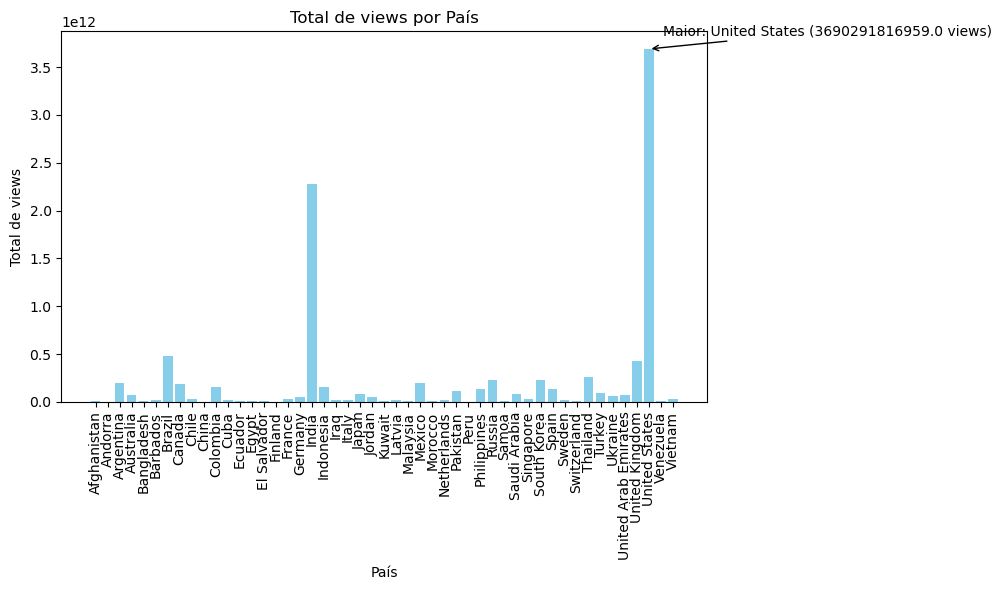

In [54]:
#Países com mais views
total_views_por_pais = dados.groupby('Country')['video views'].sum()

# Encontrando o país com o maior número de views
pais_maior_views = total_views_por_pais.idxmax()
maior_views = total_views_por_pais.max()

# Preparando dados para o gráfico de barras
paises = total_views_por_pais.index
views = total_views_por_pais.values

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(paises, views, color='skyblue')
plt.title('Total de views por País')
plt.xlabel('País')
plt.ylabel('Total de views')

# Adicionar anotação sobre o país com o maior número de views
plt.annotate(f'Maior: {pais_maior_views} ({maior_views} views)',
             xy=(paises.tolist().index(pais_maior_views), maior_views),
             xytext=(10, 10),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='black'))

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

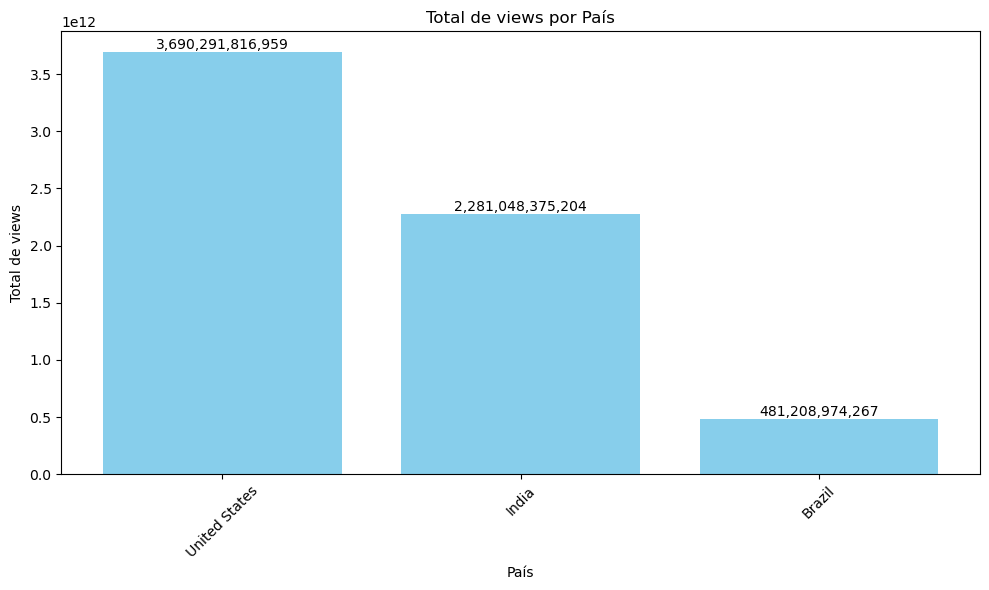

In [55]:
# Top 3 países com mais views
total_views_por_pais = dados.groupby('Country')['video views'].sum()

# Encontrando os três países com o maior número de views
top_paises = total_views_por_pais.nlargest(3)

# Preparando dados para o gráfico de barras
paises = top_paises.index
views = top_paises.values

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(paises, views, color='skyblue')
plt.title('Total de views por País')
plt.xlabel('País')
plt.ylabel('Total de views')

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50000,
             f'{views[i]:,.0f}', ha='center', va='bottom', color='black', fontsize=10)

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [56]:
#lista com todos os países do dataset, para depois separar em listas de acordo com a lingua.
lista_paises = dados['Country'].unique().tolist()
print(lista_paises)

['India', 'United States', nan, 'Japan', 'Russia', 'South Korea', 'United Kingdom', 'Canada', 'Brazil', 'Argentina', 'Chile', 'Cuba', 'El Salvador', 'Pakistan', 'Philippines', 'Thailand', 'Colombia', 'Barbados', 'Mexico', 'United Arab Emirates', 'Spain', 'Saudi Arabia', 'Indonesia', 'Turkey', 'Venezuela', 'Kuwait', 'Jordan', 'Netherlands', 'Singapore', 'Australia', 'Italy', 'Germany', 'France', 'Sweden', 'Afghanistan', 'Ukraine', 'Latvia', 'Switzerland', 'Vietnam', 'Malaysia', 'China', 'Iraq', 'Egypt', 'Andorra', 'Ecuador', 'Morocco', 'Peru', 'Bangladesh', 'Finland', 'Samoa']


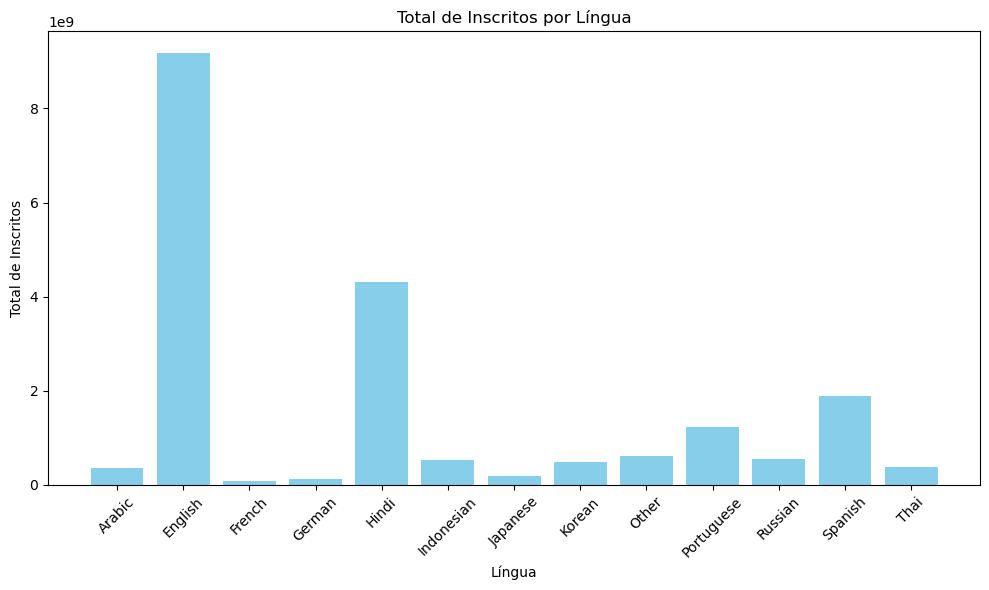

In [57]:
portugues = ['Brazil']
espanhol = ['Argentina', 'Chile', 'Cuba', 'El Salvador', 'Mexico', 'Spain', 'Colombia', 'Barbados', 'Venezuela', 'Dominican Republic', 'Ecuador', 'Peru']
ingles = ['United States', 'United Kingdom', 'Canada', 'Australia', 'Pakistan', 'Philippines']
hindi = ['India']
russo = ['Russia', 'Ukraine', 'Latvia' ]
alemao = ['Germany', 'Switzerland', 'Austria', 'Luxembourg', 'Liechtenstein', 'Belgium']
frances = ['France', 'Switzerland']
japones = ['Japan']
coreano = ['South Korea']
arabe = ['United Arab Emirates', 'Saudi Arabia', 'Kuwait']
tailandes = ['Thailand']
indonesio = ['Indonesia']

def categorizar_lingua(country):
    if pd.notnull(country):
        if country in portugues:
            return 'Portuguese'
        elif country in espanhol:
            return 'Spanish'
        elif country in ingles:
            return 'English'
        elif country in hindi:
            return 'Hindi'
        elif country in russo:
            return 'Russian'
        elif country in alemao:
            return 'German'
        elif country in frances:
            return 'French'
        elif country in japones:
            return 'Japanese'
        elif country in arabe:
            return 'Arabic'
        elif country in coreano:
            return 'Korean'
        elif country in tailandes:
            return 'Thai'
        elif country in indonesio:
            return 'Indonesian'
        else:
            return 'Other'

dados['Language'] = dados['Country'].apply(categorizar_lingua)

# Agrupando os dados por língua e calculando o total de inscritos
total_inscritos_por_lingua = dados.groupby('Language')['subscribers'].sum()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(total_inscritos_por_lingua.index, total_inscritos_por_lingua.values, color='skyblue')

# Adicionando rótulos e título
plt.title('Total de Inscritos por Língua')
plt.xlabel('Língua')
plt.ylabel('Total de Inscritos')

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


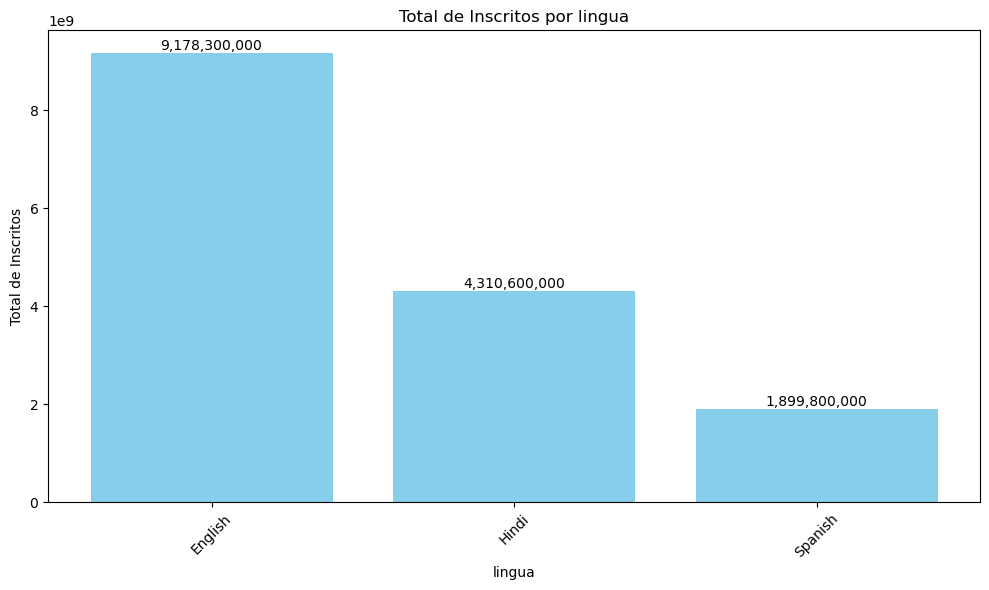

In [58]:
# Top 3 linguas com mais inscritos

# Encontrando os três linguas com o maior número de inscritos
top_linguas = total_inscritos_por_lingua.nlargest(3)

# Preparando dados para o gráfico de barras
linguas = top_linguas.index
inscritos = top_linguas.values

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(linguas, inscritos, color='skyblue')
plt.title('Total de Inscritos por lingua')
plt.xlabel('lingua')
plt.ylabel('Total de Inscritos')

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50000,
             f'{inscritos[i]:,.0f}', ha='center', va='bottom', color='black', fontsize=10)

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

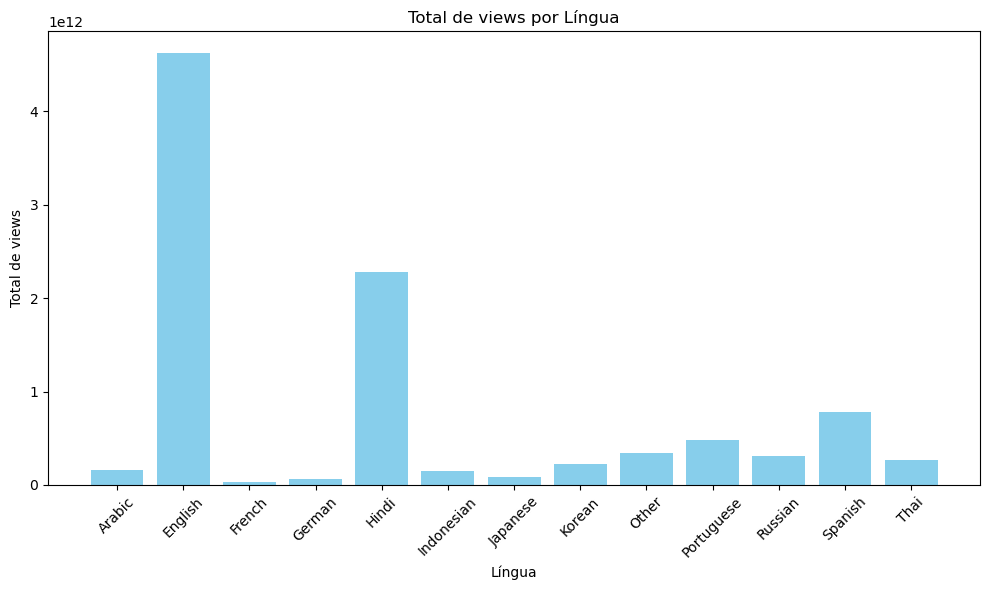

In [59]:
# Agrupando os dados por língua e calculando o total de views
total_views_por_lingua = dados.groupby('Language')['video views'].sum()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(total_views_por_lingua.index, total_views_por_lingua.values, color='skyblue')

# Adicionando rótulos e título
plt.title('Total de views por Língua')
plt.xlabel('Língua')
plt.ylabel('Total de views')

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

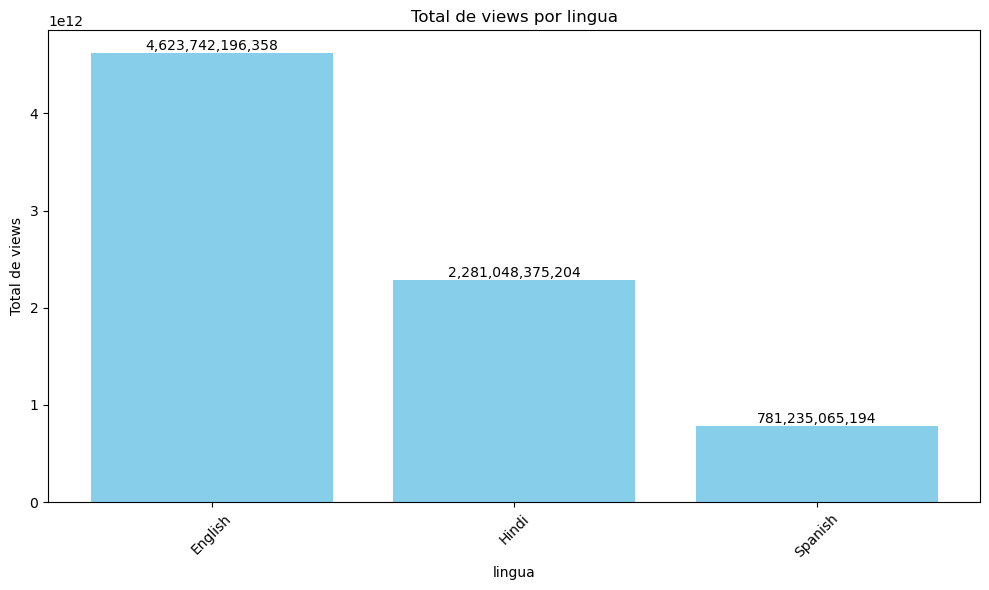

In [60]:
# Top 3 linguas com mais views

# Encontrando os três linguas com o maior número de views
top_linguas = total_views_por_lingua.nlargest(3)

# Preparando dados para o gráfico de barras
linguas = top_linguas.index
views = top_linguas.values

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(linguas, views, color='skyblue')
plt.title('Total de views por lingua')
plt.xlabel('lingua')
plt.ylabel('Total de views')


for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50000,
             f'{views[i]:,.0f}', ha='center', va='bottom', color='black', fontsize=10)

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

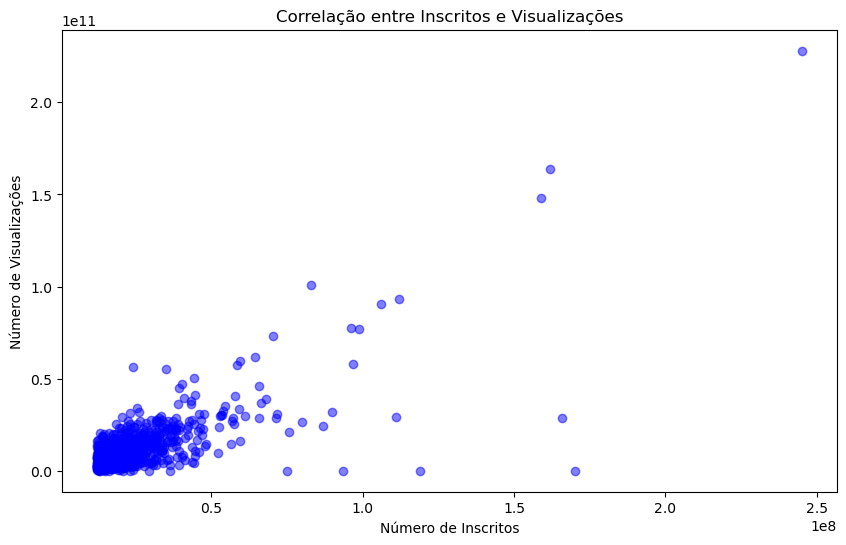

In [61]:
#Correlação entre numero de inscritos e número de views
# Plotando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(dados['subscribers'], dados['video views'], alpha=0.5, color='blue')

# Adicionando rótulos
plt.title('Correlação entre Inscritos e Visualizações')
plt.xlabel('Número de Inscritos')
plt.ylabel('Número de Visualizações')

# Exibindo o gráfico
plt.show()

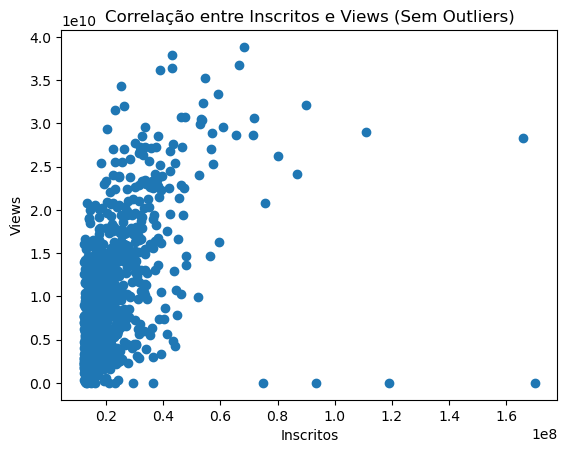

In [74]:
#Removendo outliers
mean_inscritos = dados['subscribers'].mean()
std_dev_inscritos = dados['subscribers'].std()

# Calculando os limites para remover os outliers para 'inscritos'
lower_limit_inscritos = mean_inscritos - 2 * std_dev_inscritos
upper_limit_inscritos = mean_inscritos + 2 * std_dev_inscritos

mean_views = dados['video views'].mean()
std_dev_views = dados['video views'].std()

# Calculando os limites para remover os outliers
lower_limit = mean_views - 2 * std_dev_views
upper_limit = mean_views + 2 * std_dev_views

filtered_data = dados[(dados['video views'] >= lower_limit) & (dados['video views'] <= upper_limit)]

plt.scatter(filtered_data['subscribers'], filtered_data['video views'])
plt.xlabel('Inscritos')
plt.ylabel('Views')
plt.title('Correlação entre Inscritos e Views (Sem Outliers)')
plt.show()

In [63]:
#mapas
gdf = gpd.read_file("countries.geojson")

In [64]:
inscritos_por_pais = dados.groupby('Country')['subscribers'].sum().reset_index()
merged = gdf.set_index('ADMIN').join(inscritos_por_pais.set_index('Country'))

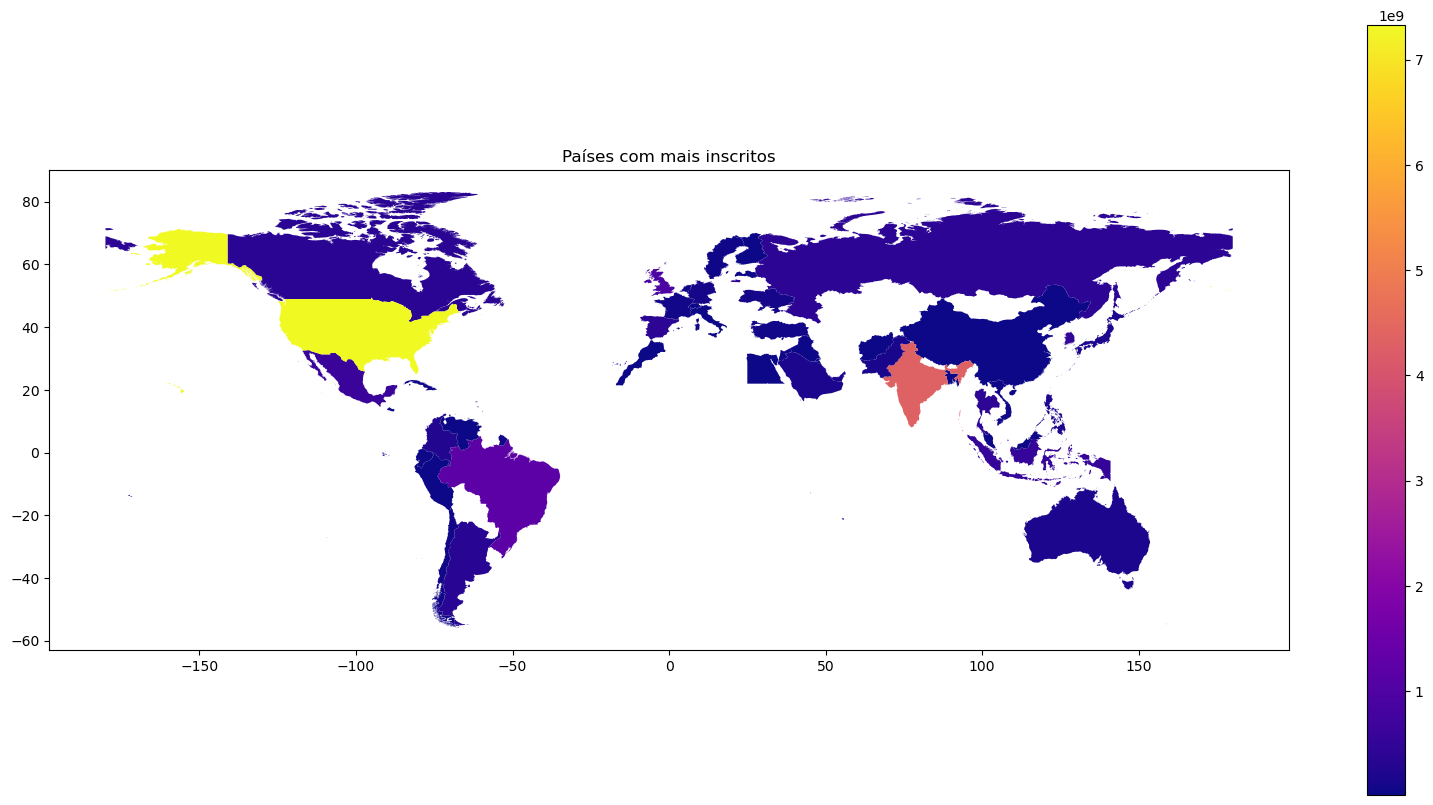

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
merged.plot(column='subscribers',cmap = 'plasma',  ax=ax, legend=True)
plt.title('Países com mais inscritos')
plt.show()

In [66]:
inscritos_por_pais_30dias = dados.groupby('Country')['subscribers_for_last_30_days'].sum().reset_index()
merged = gdf.set_index('ADMIN').join(inscritos_por_pais_30dias.set_index('Country'))

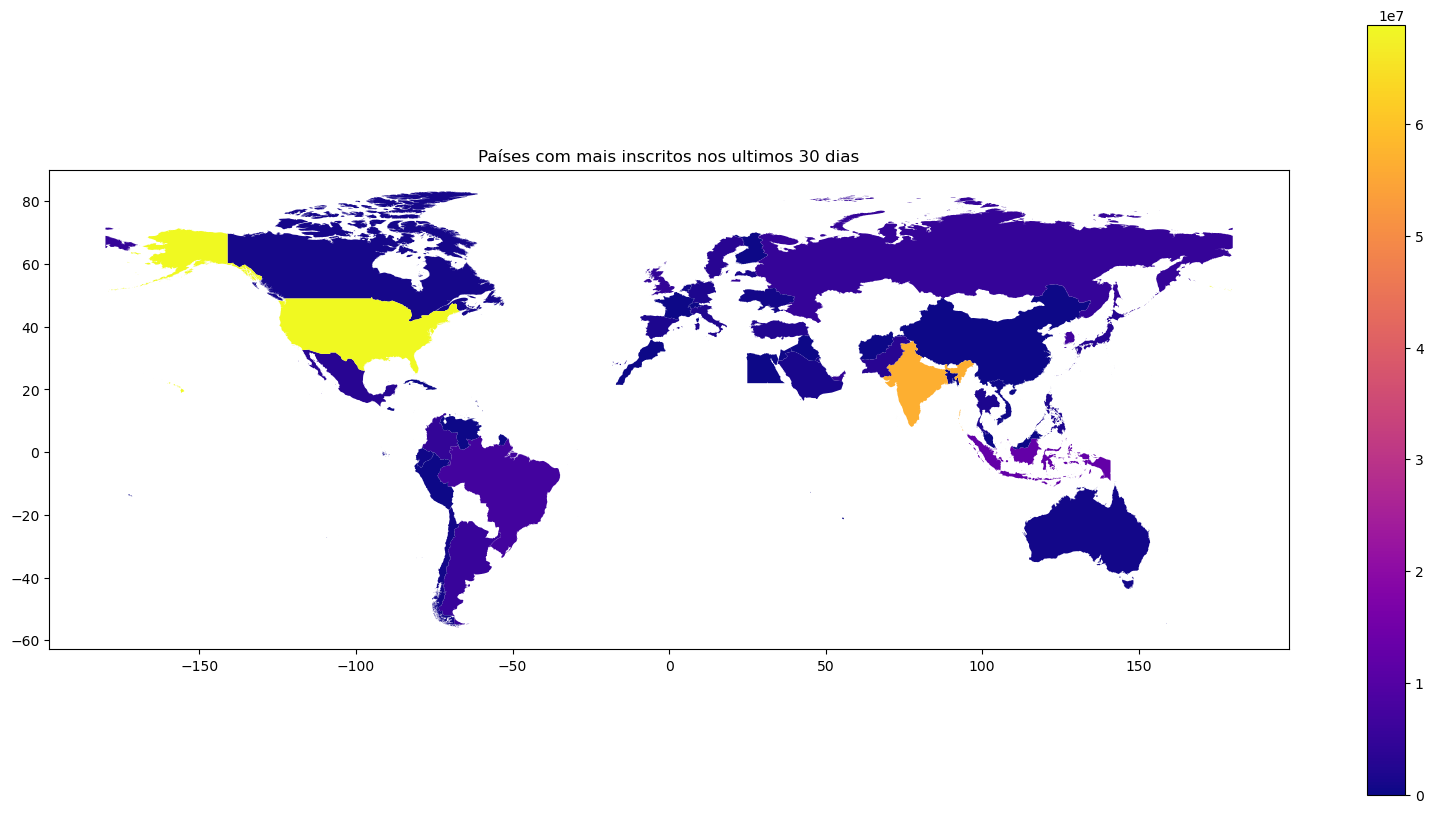

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
merged.plot(column='subscribers_for_last_30_days',cmap = 'plasma',  ax=ax, legend=True)
plt.title('Países com mais inscritos nos ultimos 30 dias')
plt.show()

In [68]:
views_por_pais = dados.groupby('Country')['video views'].sum().reset_index()
merged = gdf.set_index('ADMIN').join(views_por_pais.set_index('Country'))

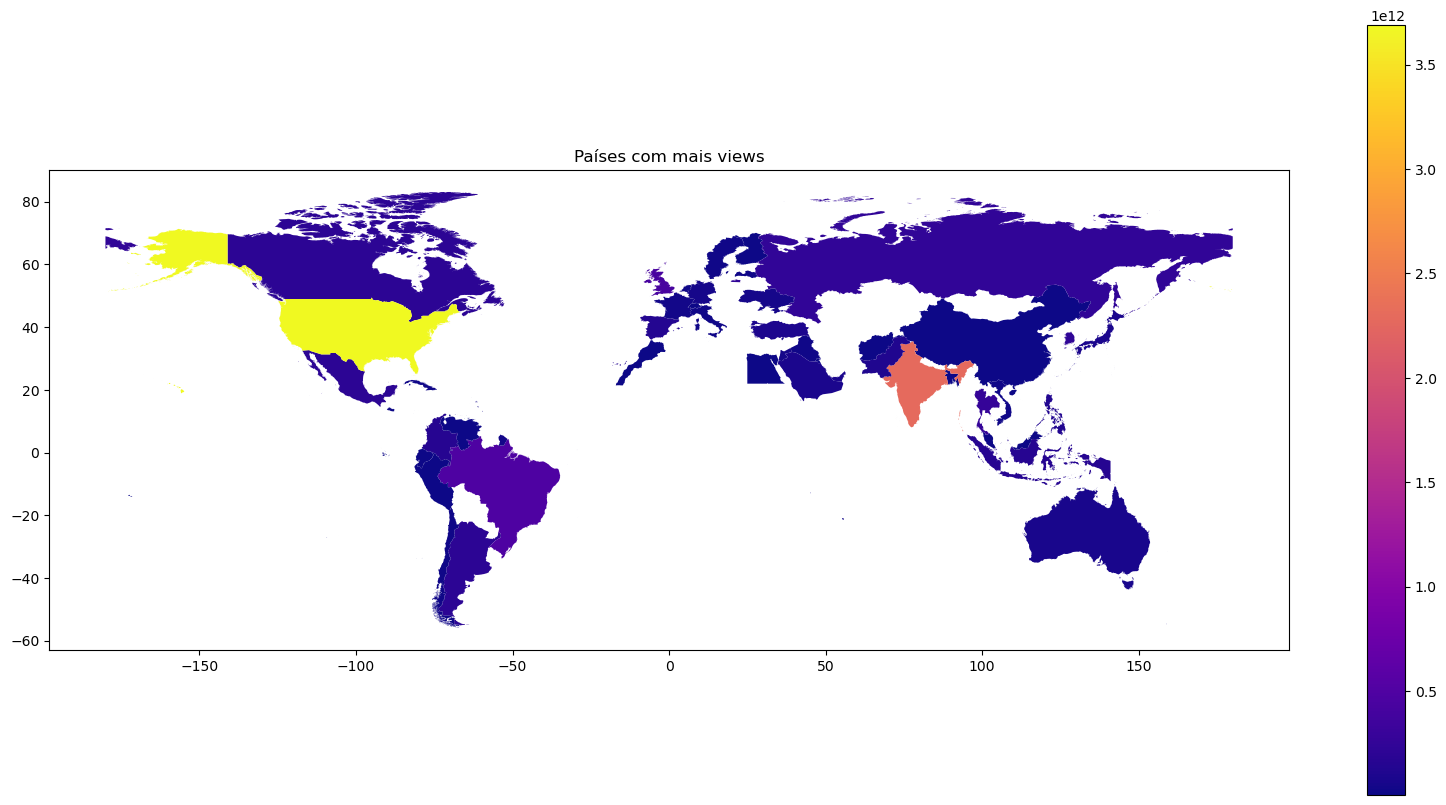

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
merged.plot(column='video views',cmap = 'plasma',  ax=ax, legend=True)
plt.title('Países com mais views')
plt.show()

In [70]:
views_por_pais_30dias = dados.groupby('Country')['video_views_for_the_last_30_days'].sum().reset_index()
merged = gdf.set_index('ADMIN').join(views_por_pais_30dias.set_index('Country'))

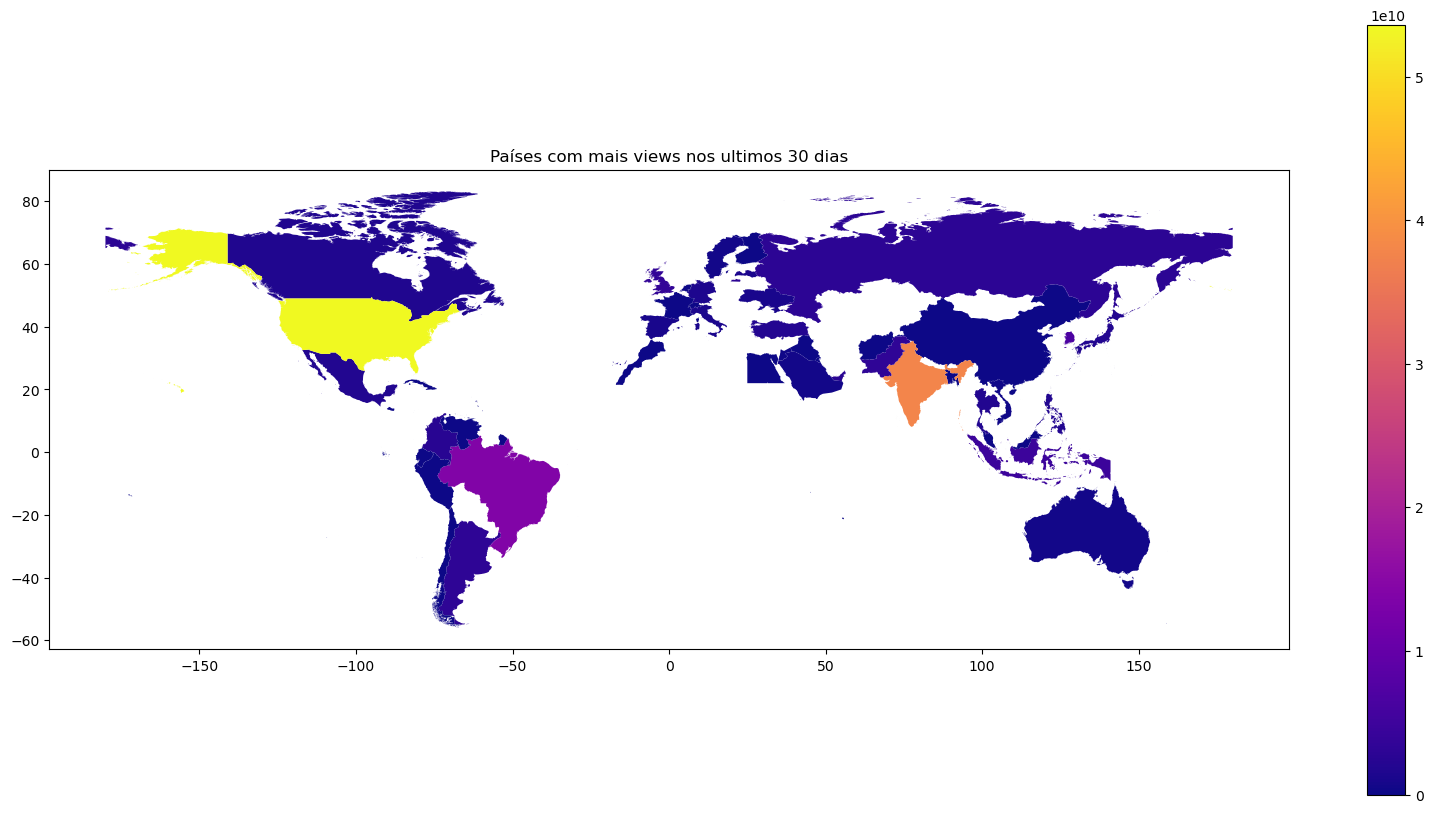

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
merged.plot(column='video_views_for_the_last_30_days',cmap = 'plasma',  ax=ax, legend=True)
plt.title('Países com mais views nos ultimos 30 dias')
plt.show()